In [7]:
%load_ext autoreload
%autoreload 2
from cluster import kmeans, utils, Silhouette
import numpy as np
from scipy.spatial.distance import cdist
import sklearn
from sklearn.metrics import silhouette_samples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [184]:
clusters, labels = utils.make_clusters(scale=0.3)

In [139]:
km = kmeans.KMeans(k=3)

In [140]:
km.fit(clusters)

Initial clusters: [[-10.25411474   8.43928875]
 [  4.41600825   2.61069135]
 [ -0.05907358   0.70695815]]
[4867582.664857601]
[[-6.17255762  5.73557803]
 [ 0.22715097  1.05767535]
 [ 3.70933145  2.35133057]]
[4867582.664857601, 4867582.664857601]
[[-6.17255762  5.73557803]
 [ 0.22715097  1.05767535]
 [ 3.70933145  2.35133057]]


In [31]:
np.random.choice(len(clusters),3)

array([106,  71, 188])

In [20]:
len(clusters)

500

In [54]:
idx = np.random.randint(len(clusters), size=4)
centroids = clusters[idx, :]

In [36]:
centroids.shape[0]

4

In [43]:
clusters[499]

array([3.93980844, 1.77821459])

In [44]:
range(500)

range(0, 500)

In [185]:
k=4
assigned_label = []
assign_error = []
n = len(clusters)

for obs in range(n):
            # Calculate error
    all_errors = np.array([])
    for centroid in range(k):
        err = kmeans.square_err(centroid, clusters[obs])
        all_errors = np.append(all_errors, err)

            # Get the nearest centroid and the error
    nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error = np.amin(all_errors)

            # Add values to corresponding lists
    assigned_label.append(nearest_centroid)
    assign_error.append(nearest_centroid_error)

In [71]:
np.array([clusters[assigned_label == k].mean(axis=0) for k in range(centroids.shape[0])])

/var/folders/cw/0j3799wn54v00326qp8dp33m0000gq/T/ipykernel_94430/2780971730.py:1: RuntimeWarning: Mean of empty slice.
  np.array([clusters[assigned_label == k].mean(axis=0) for k in range(centroids.shape[0])])
/Users/smenon/opt/anaconda3/envs/BMI203/lib/python3.10/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  if is_float16_result and out is None:


array([[[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]]])

In [219]:
assigned_label = np.array(assigned_label)

In [221]:
labels_others = assigned_label[np.arange(number_samples) != 1]

[autoreload of cluster.silhouette failed: Traceback (most recent call last):
  File "/Users/smenon/opt/anaconda3/envs/BMI203/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "/Users/smenon/opt/anaconda3/envs/BMI203/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 459, in superreload
    module = reload(module)
  File "/Users/smenon/opt/anaconda3/envs/BMI203/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/smenon/Desktop/BMI203/hw3-clustering-shreya/cluster/silhouette.p

In [229]:
np.unique(assigned_label[assigned_label != assigned_label[1]])

array([1, 3])

In [2]:
!pip install sklearn

In [1]:
import sklearn
from sklearn.metrics import silhouette_samples

ModuleNotFoundError: No module named 'sklearn'

In [347]:
clusters, labels = utils.make_clusters(k=4, scale=1)
km = kmeans.KMeans(k=4)
km.fit(clusters)
pred = km.predict(clusters)
scores = Silhouette().score(clusters, pred)

scores_sk = silhouette_samples(clusters, pred)

8
69
[array([-3.13590243, -2.44510281])]
[array([-3.13590243, -2.44510281]), array([9.74566592, 6.36034834]), array([ 7.85213901, -5.87269521]), array([-9.26111487,  2.2275321 ])]
Initial clusters: [[-3.13590243 -2.44510281]
 [ 9.74566592  6.36034834]
 [ 7.85213901 -5.87269521]
 [-9.26111487  2.2275321 ]]
assign 9253593.812495515
9253593.812495515
[9253593.812495515]
[[-4.13892616 -2.00554163]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.76761403  1.42529112]]
assign 173028.42090058222
173028.42090058222
[9253593.812495515, 173028.42090058222]
[[-4.01315043 -2.26438252]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.591323    1.29145452]]
9080565.391594933
assign 158180.40905911426
158180.40905911426
[9253593.812495515, 173028.42090058222, 158180.40905911426]
[[-3.99311493 -2.32043301]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.54833704  1.25966862]]
14848.01184146796
assign 156832.45954841684
156832.45954841684
[9253593.812495515, 173028.42090

NameError: name 'silhouette_samples' is not defined

8
69
[array([-3.13590243, -2.44510281])]
[array([-3.13590243, -2.44510281]), array([9.74566592, 6.36034834]), array([ 7.85213901, -5.87269521]), array([-9.26111487,  2.2275321 ])]
Initial clusters: [[-3.13590243 -2.44510281]
 [ 9.74566592  6.36034834]
 [ 7.85213901 -5.87269521]
 [-9.26111487  2.2275321 ]]
assign 9253593.812495515
9253593.812495515
[9253593.812495515]
[[-4.13892616 -2.00554163]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.76761403  1.42529112]]
assign 173028.42090058222
173028.42090058222
[9253593.812495515, 173028.42090058222]
[[-4.01315043 -2.26438252]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.591323    1.29145452]]
9080565.391594933
assign 158180.40905911426
158180.40905911426
[9253593.812495515, 173028.42090058222, 158180.40905911426]
[[-3.99311493 -2.32043301]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.54833704  1.25966862]]
14848.01184146796
assign 156832.45954841684
156832.45954841684
[9253593.812495515, 173028.42090

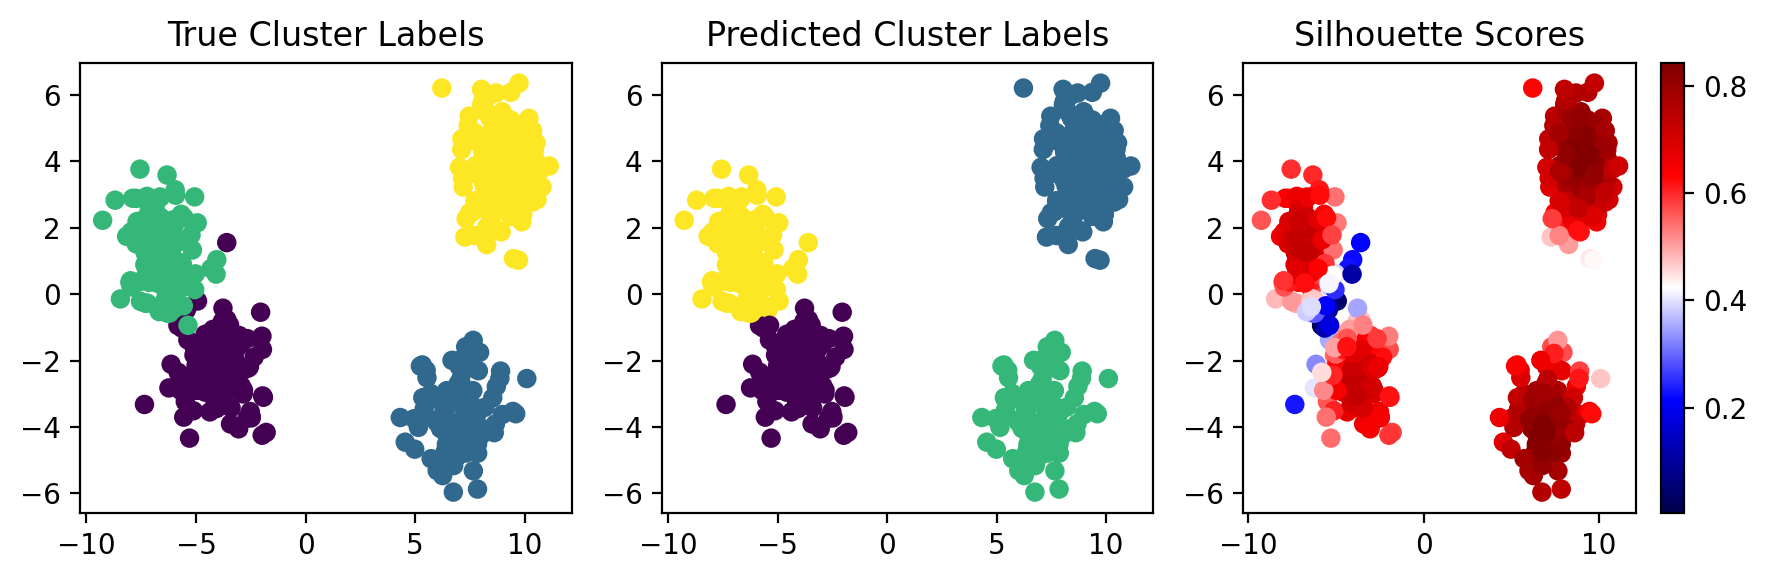

In [344]:
clusters, labels = utils.make_clusters(k=4, scale=1)
km = kmeans.KMeans(k=4)
km.fit(clusters)
pred = km.predict(clusters)
scores = Silhouette().score(clusters, pred)
utils.plot_multipanel(clusters, labels, pred, scores)

In [328]:
km.fit(clusters)

3
275
[array([-6.4233783 ,  0.38064232])]
[array([-6.4233783 ,  0.38064232]), array([11.12651107,  3.86297714]), array([ 6.74768173, -5.96348106]), array([-1.79636359, -4.16531062])]
Initial clusters: [[-6.4233783   0.38064232]
 [11.12651107  3.86297714]
 [ 6.74768173 -5.96348106]
 [-1.79636359 -4.16531062]]
assign 984775.1935913502
984775.1935913502
[984775.1935913502]
[[-4.99026089 -0.62470114]
 [ 6.49228581 -4.31565487]
 [ 7.22397275 -3.43418524]
 [ 8.85755837  3.33631117]]
assign 984775.1935913502
984775.1935913502
[984775.1935913502, 984775.1935913502]
[[-4.99026089 -0.62470114]
 [ 6.49228581 -4.31565487]
 [ 7.22397275 -3.43418524]
 [ 8.85755837  3.33631117]]
0.0
assign 984775.1935913502


In [334]:
mat = clusters

assigned_label = []
assign_error = []

n = len(mat)
k = 4

for obs in range(n):
    # Calculate error
    all_errors = np.array([])
    for centroid in range(k):
        err = (cdist(centroid, mat[obs])**2)
        all_errors = np.append(all_errors, err)

                # Get the nearest centroid and the error
    nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
    nearest_centroid_error = np.amin(all_errors)

            # Add values to corresponding lists
    assigned_label.append(nearest_centroid)
    assign_error.append(nearest_centroid_error)
sse = np.sum(assign_error)
print("assign", sse)

ValueError: XA must be a 2-dimensional array.

In [335]:
centroid

0

array([10.07900256,  9.01342573,  8.93824835,  8.36747873, 10.45666327,
        8.77446116, 10.06335209,  8.88093416,  8.38072347,  9.6387388 ,
        9.9139729 ,  9.67415376,  6.76437453,  8.38158215,  9.87105766,
        9.00983623, 10.01131607,  9.93784751,  9.05623739,  7.23000026,
       11.21191375,  9.997463  ,  9.94920015,  8.86968079, 10.32731818,
        9.57468059,  7.53347754, 10.59576616,  7.37543499, 10.62988681,
        7.83489947,  8.90551116, 10.08987998, 12.31502908,  9.32113293,
        7.43393621,  9.63731906,  7.62505865,  8.03739742, 10.22863389,
        8.90813143,  9.05960216,  9.19917336,  7.48338062,  6.95124642,
        9.441336  ,  8.82443585,  9.3239506 ,  9.92634957,  8.74237117,
        8.3541953 ,  8.51206674,  9.93547198,  8.57100231,  9.22183595,
        7.83610085,  8.61049638,  9.62820115,  8.54680028,  7.89950409,
        8.46182636,  8.84161299,  9.20011451, 10.50100925, 10.07515288,
        8.22049503,  8.69488998,  9.09553206,  9.02389101,  8.19

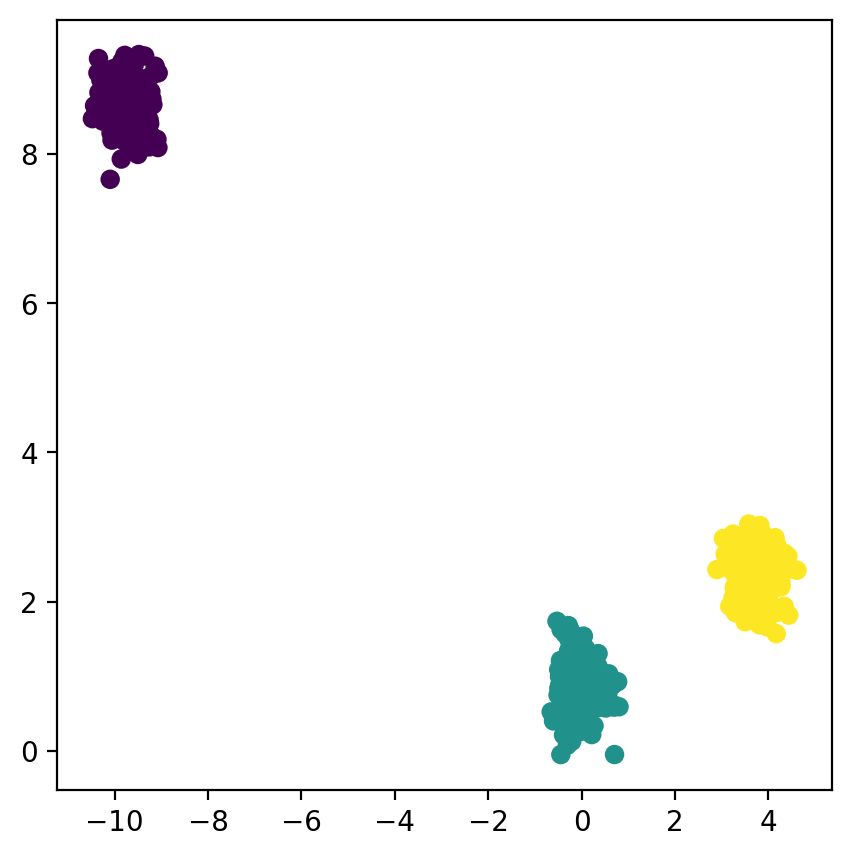

In [113]:
utils.plot_clusters(clusters, labels)

In [144]:

err

5.645373574973267

In [165]:
cdist(cluster, centroid)

ValueError: XA must be a 2-dimensional array.

In [150]:
centroid

3

In [161]:
centroid = centroids[1].astype(list)

In [164]:
cluster = clusters[obs].astype(list)

In [198]:
number_samples = clusters.shape[0]
assigned_label[np.arange(number_samples) != 1]

TypeError: only integer scalar arrays can be converted to a scalar index

In [200]:
np.arange(number_samples) != 1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [193]:
np.linalg.norm(centroids[0],clusters[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [169]:
centroids = np.array(centroids)

In [177]:
err = kmeans.square_err(centroids, clusters)

ValueError: operands could not be broadcast together with shapes (4,2) (500,2) 

In [178]:
import sys

In [179]:
d = sys.maxsize

In [181]:
d

9223372036854775807

In [8]:
clusters, labels = utils.make_clusters(k=4, scale=1)
km = kmeans.KMeans(k=4)
km.fit(clusters)
pred = km.predict(clusters)
scores = Silhouette().score(clusters, pred)

scores_sk = silhouette_samples(clusters, pred)

8
69
[array([-3.13590243, -2.44510281])]
[array([-3.13590243, -2.44510281]), array([9.74566592, 6.36034834]), array([ 7.85213901, -5.87269521]), array([-9.26111487,  2.2275321 ])]
Initial clusters: [[-3.13590243 -2.44510281]
 [ 9.74566592  6.36034834]
 [ 7.85213901 -5.87269521]
 [-9.26111487  2.2275321 ]]
assign 9253593.812495515
9253593.812495515
[9253593.812495515]
[[-4.13892616 -2.00554163]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.76761403  1.42529112]]
assign 173028.42090058222
173028.42090058222
[9253593.812495515, 173028.42090058222]
[[-4.01315043 -2.26438252]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.591323    1.29145452]]
9080565.391594933
assign 158180.40905911426
158180.40905911426
[9253593.812495515, 173028.42090058222, 158180.40905911426]
[[-3.99311493 -2.32043301]
 [ 8.90376386  3.92500241]
 [ 6.98552022 -3.74881199]
 [-6.54833704  1.25966862]]
14848.01184146796
assign 156832.45954841684
156832.45954841684
[9253593.812495515, 173028.42090

In [18]:
scores = np.ndarray.round(np.array(scores),decimals=3, out=None)
scores_sk = np.ndarray.round(np.array(scores_sk),decimals=3, out=None)

In [20]:
np.array_equal(scores, scores_sk)

True

In [67]:
np.random.seed(42)
clusters, labels = utils.make_clusters(k=4, scale=1)
#km = kmeans.KMeans(k=4)
km.fit(clusters)
pred = km.predict(clusters)
np.sort(km.get_centroids())

Initial clusters: [[ 6.91570307 -4.69680222]
 [-9.26111487  2.2275321 ]
 [ 9.74566592  6.36034834]
 [-2.47861085 -3.72818681]]
assign 11418817.441975098
assign 163493.44457765156
assign 157079.4206004134
assign 156832.45954841684
assign 156832.45954841684
assign 156832.45954841684
assign 156832.45954841684


array([[-3.74881199,  6.98552022],
       [-6.54833704,  1.25966862],
       [ 3.92500241,  8.90376386],
       [-3.99311493, -2.32043301]])

In [68]:
test_data = np.zeros((40000, 2))
test_data[0:10000, :] = 30.0
test_data[10000:20000, :] = 60.0
test_data[20000:30000, :] = 90.0
test_data[30000:, :] = 120.0

In [69]:
km.fit(test_data)

Initial clusters: [[120. 120.]
 [ 30.  30.]
 [ 60.  60.]
 [ 90.  90.]]
assign 0.0
assign 0.0
assign 0.0


In [48]:
pred = km.predict(test_data)

assign 0.0


In [70]:
np.sort(km.get_centroids())

array([[120., 120.],
       [ 30.,  30.],
       [ 60.,  60.],
       [ 90.,  90.]])

In [76]:
test_data = np.zeros((12, 1))
test_data[0:3, :] = 1
test_data[3:6, :] = 2
test_data[6:9, :] = 3
test_data[9:12, :] = 4

km = kmeans.KMeans(k=4)
km.fit(test_data)
pred = km.predict(test_data)
centr = np.sort(km.get_centroids(), axis = None)
known_centr = np.array([[1., 1.], [2., 2.], [3., 3.], [4., 4.]])

Initial clusters: [[4.]
 [1.]
 [2.]
 [3.]]
assign 0.0
assign 0.0
assign 0.0
assign 0.0


In [77]:
centr

array([1., 2., 3., 4.])